In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [50]:
ipi = pd.read_csv('data/prumysl.csv', encoding='utf-8') # industrial production index
copi = pd.read_csv('data/stavby.csv', encoding='utf-8') # construction production index

In [23]:
# We only need certain columns:
ipi = ipi[['hodnota', 'mesic', 'rok', 'mesicz', 'rokz' , 'cznace_txt', 'casz_txt']]
print(f'Before:\n{ipi.dtypes}\n')

# Convert ucet_txt to string dtype
ipi['cznace_txt'] = ipi['cznace_txt'].astype("string")
ipi['casz_txt'] = ipi['casz_txt'].astype("string")
#ipi['mesicz'] = ipi['mesicz'].astype(int)
print(f'After:\n{ipi.dtypes}')

ipi['cznace_txt'] = ipi['cznace_txt'].str.replace('a\xa0', 'a ')

Before:
hodnota              float64
mesic                  int64
rok                    int64
mesicz               float64
rokz                   int64
cznace_txt    string[python]
casz_txt      string[python]
dtype: object

After:
hodnota              float64
mesic                  int64
rok                    int64
mesicz               float64
rokz                   int64
cznace_txt    string[python]
casz_txt      string[python]
dtype: object


In [34]:
ipi['casz_txt'].unique()

<StringArray>
['stejné období předchozího roku', 'průměr bazického roku']
Length: 2, dtype: string

In [24]:
ipi_monthly = ipi[ipi['casz_txt'] == 'stejné období předchozího roku']

In [38]:
ipi_total = ipi_monthly[ipi_monthly['cznace_txt'] == 'Průmysl celkem (B+C+D)']

In [48]:
sorted = ipi_total.sort_values(['rok', 'mesic'])
sorted
sorted['datum'] = sorted['mesic'].astype(str) + '/' + sorted['rok'].astype(str)
sorted

,hodnota,mesic,rok,mesicz,rokz,cznace_txt,casz_txt,datum
4522,119.2,1,2001,1.0,2000,Průmysl celkem (B+C+D),stejné období předchozího roku,1/2001
4429,108.8,2,2001,2.0,2000,Průmysl celkem (B+C+D),stejné období předchozího roku,2/2001
4274,108.9,3,2001,3.0,2000,Průmysl celkem (B+C+D),stejné období předchozího roku,3/2001
4305,114.0,4,2001,4.0,2000,Průmysl celkem (B+C+D),stejné období předchozího roku,4/2001
4677,108.9,5,2001,5.0,2000,Průmysl celkem (B+C+D),stejné období předchozího roku,5/2001
...,...,...,...,...,...,...,...,...
17635,97.2,11,2023,11.0,2022,Průmysl celkem (B+C+D),stejné období předchozího roku,11/2023
14070,94.0,12,2023,12.0,2022,Průmysl celkem (B+C+D),stejné období předchozího roku,12/2023
14256,99.6,1,2024,1.0,2023,Průmysl celkem (B+C+D),stejné období předchozího roku,1/2024
14287,101.5,2,2024,2.0,2023,Průmysl celkem (B+C+D),stejné období předchozího roku,2/2024


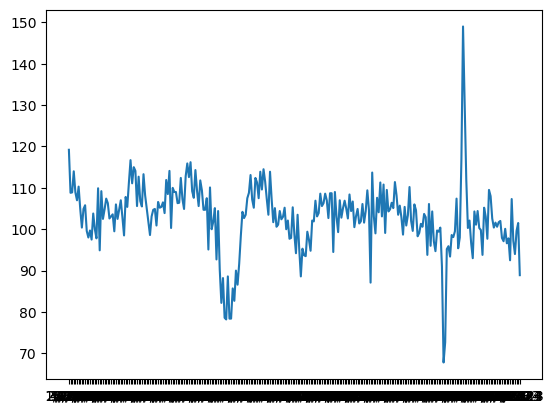

In [49]:
plt.plot(sorted['datum'], sorted['hodnota'])

In [25]:
def heatmap_monthly(sector, color):
    if color == 'blue':
        central_color = "#026660"
    elif color == 'pink':
        central_color = "#91334F"
    colors = [(1, 1, 1), central_color]  # from white to the central color
    n_bins = 100 
    cmap_name = 'custom_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    data_sector = ipi_monthly[ipi_monthly['cznace_txt'] == sector].sort_values(['rok', 'mesic'])
    pivot = data_sector.pivot(index='rok', columns='mesic', values='hodnota')
    
    plt.figure(figsize=(10, 12))
    ax = sns.heatmap(pivot, cmap=cm, annot=True, fmt=".1f")
    plt.title('Heatmap of Values by Year and Month')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='y', labelrotation=0)
    plt.xlabel('Month')
    plt.ylabel('Year')

In [28]:
ipi['cznace_txt'].unique()

<StringArray>
[                                                       'Těžba a úprava černého a hnědého uhlí',
                                                        'Výroba pryžových a plastových výrobků',
                                                         'Opravy a instalace strojů a zařízení',
                             'Výroba počítačů, elektronických a optických přístrojů a zařízení',
                                                                 'Výroba elektrických zařízení',
                                                                    'Výroba tabákových výrobků',
                                                                              'Výroba textilií',
                                                         'Tisk a rozmnožování nahraných nosičů',
                                               'Výroba chemických látek a chemických přípravků',
                                                                                 'Výroba oděvů',
 'Zpracování dře

In [27]:
ipi_monthly[ipi_monthly['cznace_txt'] == 'Výroba počítačů, elektronických a optických přístrojů a zařízení'].sort_values(['rok', 'mesic'])

,hodnota,mesic,rok,mesicz,rokz,cznace_txt,casz_txt
4498,142.2,1,2001,1.0,2000,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
4405,141.1,2,2001,2.0,2000,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
4250,146.3,3,2001,3.0,2000,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
4281,133.4,4,2001,4.0,2000,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
4653,143.4,5,2001,5.0,2000,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
...,...,...,...,...,...,...,...
17611,96.8,11,2023,11.0,2022,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
14046,111.6,12,2023,12.0,2022,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
14232,90.8,1,2024,1.0,2023,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku
14263,102.1,2,2024,2.0,2023,"Výroba počítačů, elektronických a optických př...",stejné období předchozího roku


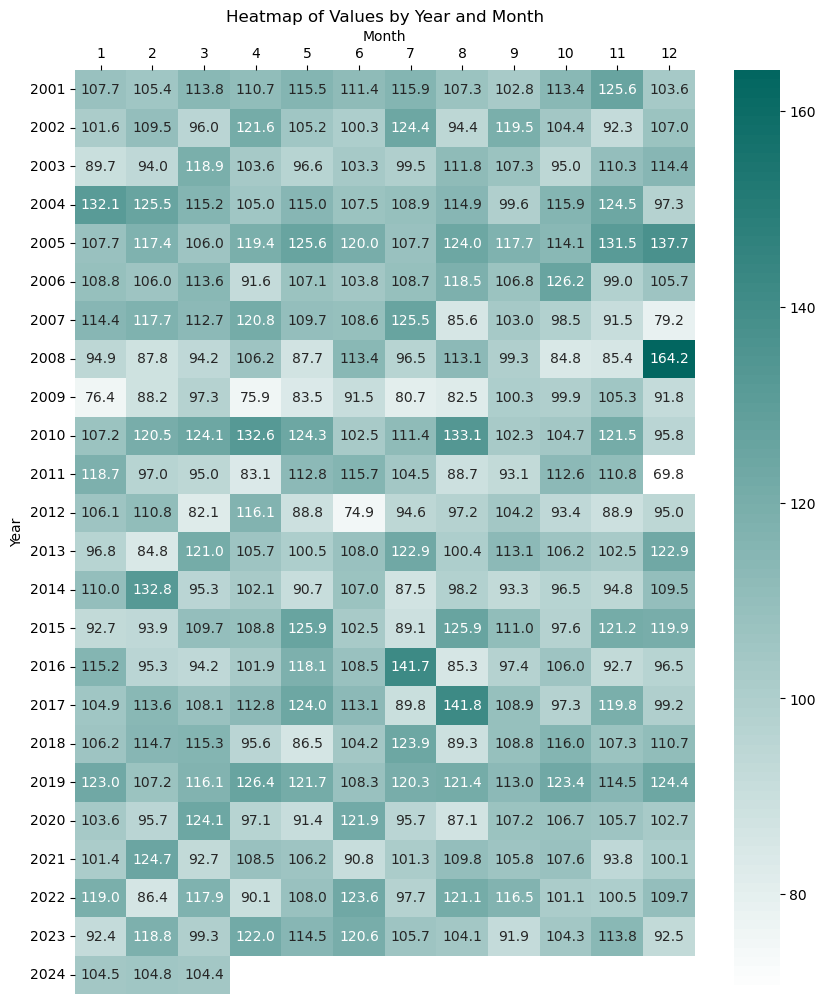

In [32]:
heatmap_monthly('Výroba základních farmaceutických výrobků a farmaceutických přípravků', 'blue')